# A meditation on sympy

I'm interested in the idea of working upper level undergraduate physics problems which are not explicitly numerical on a computer. This runs counter to the way we typically approach teaching this material, but if I'm honest, that's part of why I find it intriguing.

To better see what some of the issues are, I thought I'd work through a few problems in `sympy`.

The following examples are taken from chapter 2 of **div grad curl and all that** by h. m. schey.

## Finding the normal to a surface

Schey derives an expression for the normal to a surface: $$ \mathbf{\hat n} = {-\mathbf{i}{\partial f\over\partial x} - \mathbf{j}{\partial f \over \partial y} + \mathbf{k} \over \sqrt{1 + \left({\partial f\over \partial x}\right)^2 + \left({\partial f \over \partial y}\right)^2}},$$
assuming that we can define the surface in terms of $z = f(x,y)$.

To cement this idea, he gives the following exercise:

### Problem II-1
Find a unit vector normal to each of the following surfaces:
1. $z = 2 - x - y$
2. $z = \left(x^2+y^2\right)^{1/2}$
3. $z = \left(1-x^2\right)^{1/2}$
4. $z = x^2 + y^2$
5. $z = \left(1 - x^2/a^2 - y^2/a^2\right)^{1/2}$

Let's see if we can tackle this with `sympy`.

In [1]:
import sympy as sp
sp.init_printing()

In [2]:
n, x, y, z = sp.symbols('n x y z')

In [3]:
z = 2 - x - y

In [4]:
sp.diff(z, x)

In [5]:
def normalvec(f, rowvec=False):
    """finds a normal vector to the surface defined by z=f(x,y)."""
    dfdx = sp.diff(f, x)
    dfdy = sp.diff(f, y)
    norm = sp.sqrt(1 + dfdx**2 + dfdy**2)
    
    # this makes a row vector
    nhat = sp.Matrix([[-dfdx, -dfdy, 1]])/norm
    
    if rowvec:
        return nhat
    else:
        # returning the transpose makes it a column vector
        return nhat.T
    

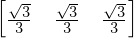

In [6]:
normalvec(z, rowvec=True)

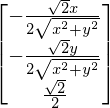

In [7]:
sp.simplify(normalvec(sp.sqrt(x**2 + y**2)))

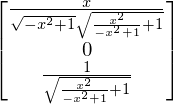

In [8]:
normalvec(sp.sqrt(1-x**2 ))

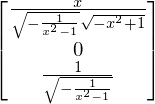

In [9]:
sp.simplify(normalvec(sp.sqrt(1-x**2 )))

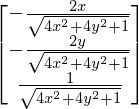

In [10]:
normalvec(x**2 + y**2)

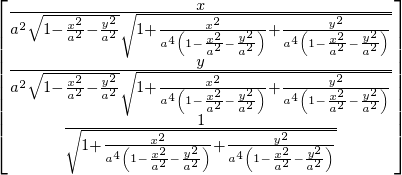

In [11]:
a = sp.symbols('a')
normalvec(sp.sqrt(1 - x**2/a**2 - y**2/a**2))

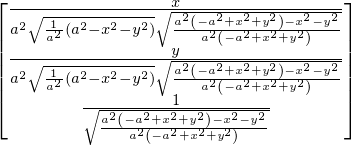

In [12]:
sp.simplify(normalvec(sp.sqrt(1 - x**2/a**2 - y**2/a**2)))

In [13]:
nhat = sp.simplify(normalvec(sp.sqrt(1 - x**2/a**2 - y**2/a**2)))

In [14]:
sp.simplify(nhat.T * nhat)

Not very difficult, but the last few are not very tidy. Perhaps working through this with different assumptions applied to our symbols (see below) would have yielded cleaner results.


##### Summary:

For this type of problem ("practice an operation to build skills/fluency/intuition") one way to approach it with `sympy` is to write a python function that carries out the operations you want to do in the proper order, and then returns the appropriate result. Often you'll want to walk through the process (or part of the process) by hand first, before writing it into a function.

Another approach would be to use direct substitution on the original expression, and then have sympy evaluate the derivatives. I use this latter approach below.


----


There are at least two other kinds of problem that are common in physics classes, however. The first of these is exemplified by Schey's problem II-2:

### Problem II-2
Show that the vector normal to the plane $$ax + by + cz = d$$ is given by $$\mathbf{n} = \pm\left( \mathbf{i}a + \mathbf{j}b + \mathbf{k}c\right)/\left( a^2 + b^2 + c^2\right)^{1/2}.$$

We might call this a "Missouri" problem, based on the first two words (and the fact that Missouri is the "Show Me" state). We could also call this a manipulation problem, since the goal is to manipulate the givens until they look like the desired end result. Let's see how to do this with `sympy`.

In [15]:
a,b,c,d,x,y,z = sp.symbols('a b c d x y z')


Start with what we're given.  Make sure it matches what was given above.

In [16]:
sp.Eq(a*x + b*y + c*z, d)

We want to solve this for $z$, so we can apply the unit normal function that we used in problem II-1.  We ought to have `sympy` do this for us.

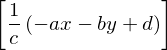

In [17]:
sp.solve(sp.Eq(a*x + b*y + c*z, d), z)

... but the output of `sympy.solve()` is a list of solutions (even though it has only one element; that's what the square brackets mean). We'll slice out that element and assign it to a variable. The most obvious choice is $z$, but we could go with anything we wanted. Again, printing an intermediate result shows us that we haven't made any coding mistakes so far.

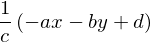

In [18]:
z = sp.solve(sp.Eq(a*x + b*y + c*z, d), z)[0]
z

Now, we have our surface defined in a form that will feed right into the function we defined for problem II-1, above. We could write it again, but it's easier just to reuse it.

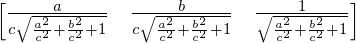

In [19]:
nhat = normalvec(z, rowvec=True)
nhat

This is the same (apart from simplification) as our desired result, but that may not be immediately obvious to everyone. We can check the equality of two expressions in three different ways. The first checks to see if they are semantically identical (i.e., do they consist of the same set of symbols in the same order?). Due to the differences in simplification, we ought to fail this test.

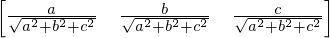

In [20]:
desired_result = sp.Matrix([[a, b, c]])/sp.sqrt(a**2 + b**2 + c**2)
desired_result

In [21]:
nhat == desired_result

False

As expected.

The second way to check equality is to subtract the two expressions and simplify, and see if we get zero. That ought to work.

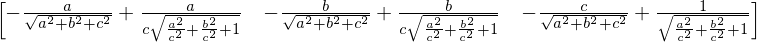

In [22]:
sp.simplify(nhat-desired_result)

You can *kind* of see that this is working, but the cancellation we would expect doesn't take place, because of the square roots. If $c$ is complex, that can cause problems. Of course, we're using $a$, $b$, $c$, and $d$ to define a plane, so they ought to be positive, real constants. The easiest way to  tell `sympy` this is when you define the symbols, which means we start over from the beginning. We will omit the intermediate results in this version for the sake of brevity.

In [23]:
# once more, with assumptions
a,b,c,d = sp.symbols('a b c d', real=True, positive=True)

# x, y, z aren't necessarily positive, but we don't need them to be real, either.
x,y,z = sp.symbols('x y z')

# this redefines z
z = sp.solve(sp.Eq(a*x + b*y + c*z, d), z)[0]

# our result
nhat = normalvec(z, rowvec=True)

# what we're looking for
desired_result = sp.Matrix([[a, b, c]])/sp.sqrt(a**2 + b**2 + c**2)

# check to see if they're equal
sp.simplify(nhat-desired_result)

Since the difference is zero, the two expressions are equal.


The third way to check equality is to have `sympy` substitute in some numbers. Doing this well is complicated, and we don't need it here, so I'm not going to talk more about it at this time.


##### Recapping:

For this type of problem,  work out each step interactively, showing intermediate results. Finish off with some sort of test of equality between what you've generated from what you were given, and what you were trying to get. If they check out, you're done.

----


The third kind of problem that shows up in (especially upper level) physics classes is that you are asked to *derive a new (to you) result*.  This is exemplified by Schey's problem II-3.

### Problem II-3
Derive expressions for the unit normal vector for surfaces given by $y=g(x,z)$ and $x=h(y,z)$. Use each to rederive the normal to the plane found in problem II-2.

The exact steps in any derivation will differ, but as is often the case in this kind of homework problem, we have a model laid out in the text. In this case you define two vectors that are tangent to the surface, and take their cross product. Since the cross product is orthogonal to the two vectors that went into it, the result will be orthogonal to the surface. Then, we can normalize it by dividing by its magnitude.

The two vectors are made by intersecting planes with the surface. Figures II-4 and II-5 in the text give the idea.

At this point, there are a couple of approaches. We have to work out derivations for two separate cases. We could either go ahead and do them separately, or we could try to code the method up in a general enough way so that it will work for both. There's nothing fundamentally wrong with the first approach, but it goes against the ethic of not repeating effort unless absolutely necessary. Also, the second approach, when done correctly, can demonstrate a deeper understanding of what's actually going on in the derivation.

Since this needs to work with arbitrary functions, that's where we will begin.

In [24]:
from sympy import Function

We can define arbitrary functions with or without arguments in `sympy`. Since we know in advance what the arguments will be in this case, we can go ahead and include the arguments in the definition.

In [25]:
x,y,z = sp.symbols('x y z')

g = Function('g')(x, z)
h = Function('h')(y, z)

We're going to want to use a little bit of *introspection* to figure out what the arguments of each function are, so that we can treat $g(x,z)$ differently from $h(y,z)$. The most compact and efficient way to do this makes use of two `python` features you may not have seen, so I'll walk through the whole process slowly.

First of all, we need to know the arguments of a function. Fortunately, `sympy` functions provide this.

In [26]:
g.args

The next thing we need is a *list comprehension*. Basically, it's a compact and efficient way to construct a list on the fly without explicitly writing loops.

Let's say I have a collection of coordinates, and I want to build a list that consists of some test or operation applied to each of those coordinates. In this case, the question I want to ask is, Is this coordinate present in the list of arguments to my function? Here I'm putting my coordinates in a tuple instead of a list (because tuples are immutable, and I don't want to be able to change my coordinates by accident) but either would work. 

In [27]:
coords = (x,y,z)

[coord in g.args for coord in coords]

[True, False, True]

The way to read this is: make a list (the outer square brackets) of whether or not a variable occurs in the arguments of $g$ (`coord in g.args`); where the variables you test are the ones in my collection of coordinates (`for coord in coords`).

If you're new-ish to python, this may look strange, because we're using the word `in` in two slightly different ways. In the first case, we're asking a question: Is `coord` present in the collection `g.args`? In the second case, we're providing a collection of values to use: "I want you to take each value of this collection called `coords`, and insert it into the previous question where you found the symbol `coord`. The result will be an element in our final list."

In this case, $x$ and $z$ are in `g.args`, but $y$ is not, so our result is `[True, False, True]`.

Now, we want to use this result to pull out the missing coordinate. There's more than one way to do this, but the best way makes use of a feature present in numpy arrays (but not, sadly, in regular python lists) called *Boolean indexing*.  The idea is that we will use an array of truth values as a mask for the array we're interested in, only returning the ones that are true. Here it is in action:

In [28]:
import numpy as np

coords = np.array((x,y,z))

mask = [coord in g.args for coord in coords]

coords[mask]

array([x, z], dtype=object)

We threw away $y$, because it was `False` in the mask. That's the opposite of what we want, so let's change the definition of our mask to be true for coordinates *not* in the argument list of $g$.

In [29]:
coords = np.array((x,y,z))

mask = [var not in g.args for var in coords]
coords[mask]

array([y], dtype=object)

We're almost there, but we don't want an array, we just want the coordinate, so we slice out the first element.

In [30]:
coords = np.array((x,y,z))

mask = [var not in g.args for var in coords]
coords[mask][0]

Perfect. Now, we're going to want to build some vectors. Since we're using row (or equivalently, column) matrices for our vectors, we need a way to translate between each coordinate and its position in the matrix. There is likely a more elegant way to do this, but the following approach is clear, and it works.

In [31]:
def position_from_coordinate(coord):
    """Get the index of a coordinate for building vectors."""
    
    # we don't want to depend on these being defined elsewhere.
    x,y,z = sp.symbols('x y z')
    
    if coord == x:
        return 0
    elif coord == y:
        return 1
    elif coord == z:
        return 2
    else:
        raise ValueError("Unknown Coordinate")

In [32]:
position_from_coordinate(x)

In [33]:
# takes: a function (func)
def derive_normal_vector_formula(func, debug=False):
    """Given a function in two coordinates defining a surface, return a formula for
    a vector normal to that surface.
    """

    # figure out which coordinate is missing (the dependent variable)
    x,y,z = sp.symbols('x y z')
    coords = np.array((x,y,z))
    dependent = coords[[var not in func.args for var in coords]][0]
    if debug:
        print("dependent variable: {}".format(dependent))
    
    # get the position of the depenent variable
    dep_pos = position_from_coordinate(dependent)

    # debugging info
    if debug:
        print("dependent position: {}".format(dep_pos))
    
    # set up storage for the vectors that go into the cross product
    vecs = [None, None]
    
    # error checking
    if len(func.args) != 2:
        raise ValueError("func has wrong number of arguments: {} (2 expected)", len(func.args))
    
    # for each coordinate that is present:
    for index, coord in enumerate(func.args):
        # get the position of that coordinate (the independent variable)
        indep_pos = position_from_coordinate(coord)
        
        # make an empty row vector
        vecs[index] = sp.Matrix([[0,0,0]])
        
        # the independent position in the empty row vector gets 1
        vecs[index][0,indep_pos] = 1
        
        # the dependent position in the empty row vector gets d/d(independent) func
        vecs[index][0, dep_pos] = sp.diff(func, coord)
        
        # debugging:
        if debug:
            print("vector {}: {}".format(index, vecs[index]))
        
    # take the cross product of the two vectors
    n = vecs[0].cross(vecs[1])
    
    # normalize
    nhat = n/sp.sqrt(n.dot(n))
    
    # return the result
    return nhat

Incidentally, inserting `print` statements as a debugging tool (while it works) is not best practice. It is **far** better to build your functions in such a way that you can apply unit tests to them. I didn't want to introduce the complexity of a unit testing framework at this stage, so in the interest of transparency, I used the quick-and-dirty `print` statement method.

We are now ready to execute this and derive the two formulae we've been asked for. Just as a check, let's start with the one given in the text to make sure everything is working.

In [34]:
x,y,z = sp.symbols('x y z')

f = Function('f')(x, y)
g = Function('g')(x, z)
h = Function('h')(y, z)

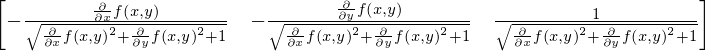

In [35]:
derive_normal_vector_formula(f)

This matches what was derived in the text. What about the others?

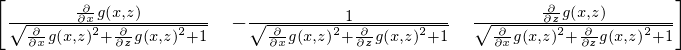

In [36]:
derive_normal_vector_formula(g)

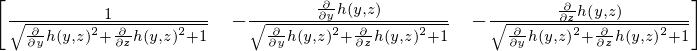

In [37]:
derive_normal_vector_formula(h)

In [38]:
n_from_h = derive_normal_vector_formula(h)

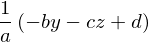

In [39]:
a,b,c,d = sp.symbols('a b c d', real=True, positive=True)

plane = sp.Eq(a*x + b*y + c*z, d)

my_h = sp.solve(plane, x)[0]
my_h

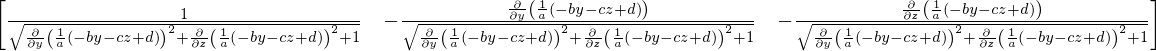

In [40]:
n_from_h.subs(h, my_h)

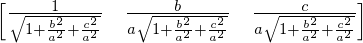

In [41]:
n_from_h.subs(h, my_h).doit()

In [42]:
sp.simplify(n_from_h.subs(h, my_h).doit()-desired_result)

So, it works.  


##### Summary: 

This is the most challenging of the three types of homework problems. Since I had to derive multiple expressions (one for $g(x,z)$ and one for $h(y,z)$), I decided to write a python function, but I could also have just gone through the steps by hand. Generally speaking, if I'm going to do something more than once, writing a function isn't a bad idea, but it's worth noting that a significant fraction of the work (the introspection and list comprehension pieces, in particular) were a direct result of my wanting to use a generalizable function, rather than just wading in and doing the operations by hand.

Looking at --- or better still, testing --- intermediate and/or known results is an important part of the process here to make sure you haven't made a mistake. 

----

